# Use of Normalization

In [ ]:
# import relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, BatchNormalization

In [ ]:
def load_data():
  (train_samples,train_labels), (test_samples,test_labels) = mnist.load_data()
  return train_samples, train_labels, test_samples, test_labels

train_samples, train_labels, test_samples, test_labels = load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
# check the shape of the data
print(train_samples.shape)
print(train_labels.shape)
print(test_samples.shape)
print(test_labels.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


# Scaling

In [ ]:
def convert_dtype(x):
   
    
    x_float=x.astype('float32')
    return x_float

train_samples = convert_dtype(train_samples)
test_samples = convert_dtype(test_samples)

In [ ]:
def normalize(x):
  y = (x - np.min(x))/np.ptp(x)   #ptp function is used to find the range
  return y

train_samples = normalize(train_samples)
test_samples = normalize(test_samples)

In [ ]:
# to check if train_samples is normalized or not
np.isclose(np.amax(train_samples), 1)

True

In [ ]:
# We need to reshape our train_data to be of shape (samples, height, width, channels) pass to Conv2D layer of keras

def reshape(x):
    
    
    x_r=x.reshape(x.shape[0],x.shape[1],x.shape[2],1)
    return x_r

train_samples = reshape(train_samples)
test_samples = reshape(test_samples)

In [ ]:
def oneHot(y, Ny):
    
    import tensorflow 
    from keras.utils import to_categorical
    Ny=len(np.unique(y))
    y_oh=to_categorical(y,num_classes=Ny)
    return y_oh

# example
train_labels = oneHot(train_labels, 10)
test_labels = oneHot(test_labels, 10)

# Without Normalization

In [ ]:
relu_model_nn = Sequential()
relu_model_nn.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28,28,1)))
relu_model_nn.add(Conv2D(32, kernel_size=3, activation='relu'))
relu_model_nn.add(Flatten())
relu_model_nn.add(Dense(10, activation='softmax'))
relu_model_nn.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
relu_results_nn = relu_model_nn.fit(train_samples, train_labels, validation_split = 0.2, epochs=20, batch_size=64)

Epoch 1/20
750/750 [==============================] - 13s 6ms/step - loss: 0.1676 - accuracy: 0.9490 - val_loss: 0.0649 - val_accuracy: 0.9811
Epoch 2/20
750/750 [==============================] - 4s 5ms/step - loss: 0.0527 - accuracy: 0.9834 - val_loss: 0.0591 - val_accuracy: 0.9825
Epoch 3/20
750/750 [==============================] - 4s 6ms/step - loss: 0.0348 - accuracy: 0.9888 - val_loss: 0.0576 - val_accuracy: 0.9836
Epoch 4/20
750/750 [==============================] - 4s 6ms/step - loss: 0.0255 - accuracy: 0.9919 - val_loss: 0.0536 - val_accuracy: 0.9859
Epoch 5/20
750/750 [==============================] - 4s 6ms/step - loss: 0.0173 - accuracy: 0.9941 - val_loss: 0.0603 - val_accuracy: 0.9842
Epoch 6/20
750/750 [==============================] - 4s 6ms/step - loss: 0.0136 - accuracy: 0.9954 - val_loss: 0.0584 - val_accuracy: 0.9851
Epoch 7/20
750/750 [==============================] - 4s 5ms/step - loss: 0.0104 - accuracy: 0.9967 - val_loss: 0.0691 - val_accuracy: 0.9850
Epoch

# Using Normalization

In [ ]:
relu_model_bn = Sequential()
relu_model_bn.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28,28,1)))
relu_model_bn.add(BatchNormalization())
relu_model_bn.add(Conv2D(32, kernel_size=3, activation='relu'))
relu_model_bn.add(BatchNormalization())
relu_model_bn.add(Flatten())
relu_model_bn.add(Dense(10, activation='softmax'))
relu_model_bn.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
relu_results_bn = relu_model_bn.fit(train_samples, train_labels, validation_split = 0.2, epochs=20, batch_size=64)

Epoch 1/20
750/750 [==============================] - 5s 6ms/step - loss: 0.2464 - accuracy: 0.9487 - val_loss: 0.1253 - val_accuracy: 0.9728
Epoch 2/20
750/750 [==============================] - 5s 6ms/step - loss: 0.0843 - accuracy: 0.9822 - val_loss: 0.1071 - val_accuracy: 0.9802
Epoch 3/20
750/750 [==============================] - 5s 6ms/step - loss: 0.0492 - accuracy: 0.9878 - val_loss: 0.1150 - val_accuracy: 0.9796
Epoch 4/20
750/750 [==============================] - 5s 6ms/step - loss: 0.0288 - accuracy: 0.9921 - val_loss: 0.1211 - val_accuracy: 0.9766
Epoch 5/20
750/750 [==============================] - 5s 6ms/step - loss: 0.0199 - accuracy: 0.9941 - val_loss: 0.1410 - val_accuracy: 0.9798
Epoch 6/20
750/750 [==============================] - 5s 6ms/step - loss: 0.0231 - accuracy: 0.9933 - val_loss: 0.1110 - val_accuracy: 0.9822
Epoch 7/20
750/750 [==============================] - 5s 6ms/step - loss: 0.0183 - accuracy: 0.9950 - val_loss: 0.1598 - val_accuracy: 0.9793
Epoch 

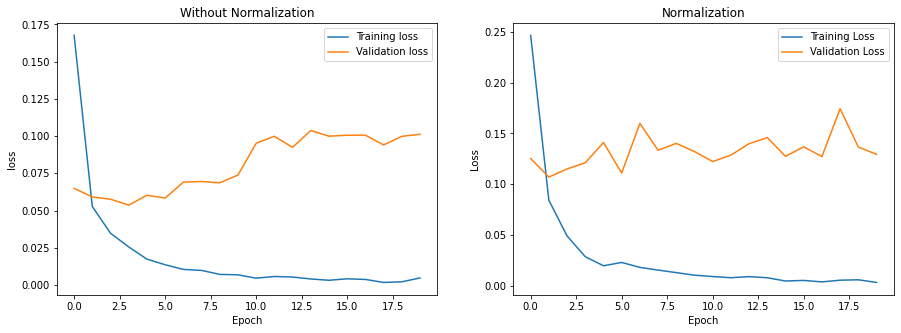

In [ ]:
fig, axs = plt.subplots(1,2,figsize=(15,5)) 
axs[0].plot(relu_results_nn.history['loss'])
axs[0].plot(relu_results_nn.history['val_loss'])
axs[0].set_title('Without Normalization')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('loss')
axs[0].legend(['Training loss', 'Validation loss'])
axs[1].plot(relu_results_bn.history['loss'])
axs[1].plot(relu_results_bn.history['val_loss'])
axs[1].set_title('Normalization')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Loss')
axs[1].legend(['Training Loss', 'Validation Loss'])

plt.show()